<a href="https://colab.research.google.com/github/sainikhila11/SaiNikhila_INFO5731_Spring2024/blob/main/SaiNikhila_INFO5731_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import openai
from scipy.spatial.distance import cosine

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Define the fixed definition for correctness
CORRECTNESS_DEFINITION = "Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness."

# Load your dataset
df = pd.read_excel('/content/Train0.xlsx')

# Define a function to get embeddings for a list of texts
def get_embeddings(texts, engine="text-embedding-ada-002"):
    try:
        response = openai.Embedding.create(input=texts, engine=engine)
        embeddings = [item['embedding'] for item in response['data']]
        return embeddings
    except Exception as e:
        print(f"Error getting embeddings: {e}")
        return [None] * len(texts)

# Define a function to perform a preliminary context check
def preliminary_context_check(description, disease):
    try:
        response = openai.Completion.create(
            model="gpt-3.5-turbo-instruct",
            prompt=f"{CORRECTNESS_DEFINITION}\n\nIs the term '{disease}' contextually relevant to the description '{description}'? If not, suggest the most appropriate term.",
            max_tokens=50,
            temperature=0.3
        )
        corrected_term = response.choices[0].text.strip()
        return corrected_term
    except Exception as e:
        print(f"Error querying OpenAI for preliminary context: {e}")
        return "Error"

# Apply the validation function to the dataset
correctness_values = []
for _, row in df.iterrows():
    corrected_term = preliminary_context_check(row['Description'], row['Disease'])
    description_embedding = get_embeddings([row['Description']])
    disease_embedding = get_embeddings([row['Disease']])
    description_emb = description_embedding[0]
    disease_emb = disease_embedding[0]
    if description_emb is not None and disease_emb is not None:
        similarity = 1 - cosine(description_emb, disease_emb)
        correctness_values.append(similarity)
    else:
        correctness_values.append(None)

# Calculate Correctness Score
correctness_score = sum(correctness_values) / len(correctness_values)

# Print Correctness Score and the definition
print(f"Definition for Correctness: {CORRECTNESS_DEFINITION}")
print(f"Correctness Score: {round(correctness_score, 2)}")


Definition for Correctness: Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness.
Correctness Score: 0.96


In [ ]:
import pandas as pd
import openai
from scipy.spatial.distance import cosine
from tqdm import tqdm  # Import tqdm for progress tracking

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Define the fixed definition for correctness
CORRECTNESS_DEFINITION = "Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness."

# Load your dataset
df = pd.read_excel('/content/Train1.xlsx')

# Define a function to get embeddings for a list of texts
def get_embeddings(texts, engine="text-embedding-ada-002"):
    try:
        response = openai.Embedding.create(input=texts, engine=engine)
        embeddings = [item['embedding'] for item in response['data']]
        return embeddings
    except Exception as e:
        print(f"Error getting embeddings: {e}")
        return [None] * len(texts)

# Define a function to perform a preliminary context check
def preliminary_context_check(description, disease):
    try:
        response = openai.Completion.create(
            model="gpt-3.5-turbo-instruct",
            prompt=f"{CORRECTNESS_DEFINITION}\n\nIs the term '{disease}' contextually relevant to the description '{description}'? If not, suggest the most appropriate term.",
            max_tokens=50,
            temperature=0.3
        )
        corrected_term = response.choices[0].text.strip()
        return corrected_term
    except Exception as e:
        print(f"Error querying OpenAI for preliminary context: {e}")
        return "Error"

# Apply the validation function to the dataset
correctness_values = []
total_iterations = len(df)  # Get total number of iterations
with tqdm(total=total_iterations, desc="Processing") as pbar:  # Initialize progress bar
    for _, row in df.iterrows():
        corrected_term = preliminary_context_check(row['Description'], row['Disease'])
        description_embedding = get_embeddings([row['Description']])
        disease_embedding = get_embeddings([row['Disease']])
        description_emb = description_embedding[0]
        disease_emb = disease_embedding[0]
        if description_emb is not None and disease_emb is not None:
            similarity = 1 - cosine(description_emb, disease_emb)
            correctness_values.append(similarity)
        else:
            correctness_values.append(None)
        pbar.update(1)  # Update progress bar

# Calculate Correctness Score
correctness_score = sum(correctness_values) / len(correctness_values)

# Print Correctness Score and the definition
print(f"Definition for Correctness: {CORRECTNESS_DEFINITION}")
print(f"Correctness Score: {round(correctness_score, 2)}")


Processing: 100%|██████████| 4817/4817 [1:10:13<00:00,  1.14it/s]

Definition for Correctness: Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness.
Correctness Score: 0.96


In [ ]:
import pandas as pd
import openai
from scipy.spatial.distance import cosine
from tqdm import tqdm  # Import tqdm for progress tracking

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Define the fixed definition for correctness
CORRECTNESS_DEFINITION = "Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness."

# Load your dataset
df = pd.read_excel('/content/Train2.xlsx')

# Define a function to get embeddings for a list of texts
def get_embeddings(texts, engine="text-embedding-ada-002"):
    try:
        response = openai.Embedding.create(input=texts, engine=engine)
        embeddings = [item['embedding'] for item in response['data']]
        return embeddings
    except Exception as e:
        print(f"Error getting embeddings: {e}")
        return [None] * len(texts)

# Define a function to perform a preliminary context check
def preliminary_context_check(description, disease):
    try:
        response = openai.Completion.create(
            model="gpt-3.5-turbo-instruct",
            prompt=f"{CORRECTNESS_DEFINITION}\n\nIs the term '{disease}' contextually relevant to the description '{description}'? If not, suggest the most appropriate term.",
            max_tokens=50,
            temperature=0.3
        )
        corrected_term = response.choices[0].text.strip()
        return corrected_term
    except Exception as e:
        print(f"Error querying OpenAI for preliminary context: {e}")
        return "Error"

# Apply the validation function to the dataset
correctness_values = []
total_iterations = len(df)  # Get total number of iterations
with tqdm(total=total_iterations, desc="Processing") as pbar:  # Initialize progress bar
    for _, row in df.iterrows():
        corrected_term = preliminary_context_check(row['Description'], row['Disease'])
        description_embedding = get_embeddings([row['Description']])
        disease_embedding = get_embeddings([row['Disease']])
        description_emb = description_embedding[0]
        disease_emb = disease_embedding[0]
        if description_emb is not None and disease_emb is not None:
            similarity = 1 - cosine(description_emb, disease_emb)
            correctness_values.append(similarity)
        else:
            correctness_values.append(None)
        pbar.update(1)  # Update progress bar

# Calculate Correctness Score
correctness_score = sum(correctness_values) / len(correctness_values)

# Print Correctness Score and the definition
print(f"Definition for Correctness: {CORRECTNESS_DEFINITION}")
print(f"Correctness Score: {round(correctness_score, 2)}")


Processing: 100%|██████████| 4791/4791 [1:43:05<00:00,  1.29s/it]

Definition for Correctness: Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness.
Correctness Score: 0.96


In [ ]:
import pandas as pd
import openai
from scipy.spatial.distance import cosine
from tqdm import tqdm  # Import tqdm for progress tracking

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Define the fixed definition for correctness
CORRECTNESS_DEFINITION = "Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness."

# Load your dataset
df = pd.read_excel('/content/Train3.xlsx')

# Define a function to get embeddings for a list of texts
def get_embeddings(texts, engine="text-embedding-ada-002"):
    try:
        response = openai.Embedding.create(input=texts, engine=engine)
        embeddings = [item['embedding'] for item in response['data']]
        return embeddings
    except Exception as e:
        print(f"Error getting embeddings: {e}")
        return [None] * len(texts)

# Define a function to perform a preliminary context check
def preliminary_context_check(description, disease):
    try:
        response = openai.Completion.create(
            model="gpt-3.5-turbo-instruct",
            prompt=f"{CORRECTNESS_DEFINITION}\n\nIs the term '{disease}' contextually relevant to the description '{description}'? If not, suggest the most appropriate term.",
            max_tokens=50,
            temperature=0.3
        )
        corrected_term = response.choices[0].text.strip()
        return corrected_term
    except Exception as e:
        print(f"Error querying OpenAI for preliminary context: {e}")
        return "Error"

# Apply the validation function to the dataset
correctness_values = []
total_iterations = len(df)  # Get total number of iterations
with tqdm(total=total_iterations, desc="Processing") as pbar:  # Initialize progress bar
    for _, row in df.iterrows():
        corrected_term = preliminary_context_check(row['Description'], row['Disease'])
        description_embedding = get_embeddings([row['Description']])
        disease_embedding = get_embeddings([row['Disease']])
        description_emb = description_embedding[0]
        disease_emb = disease_embedding[0]
        if description_emb is not None and disease_emb is not None:
            similarity = 1 - cosine(description_emb, disease_emb)
            correctness_values.append(similarity)
        else:
            correctness_values.append(None)
        pbar.update(1)  # Update progress bar

# Calculate Correctness Score
correctness_score = sum(correctness_values) / len(correctness_values)

# Print Correctness Score and the definition
print(f"Definition for Correctness: {CORRECTNESS_DEFINITION}")
print(f"Correctness Score: {round(correctness_score, 4)}")


Processing: 100%|██████████| 4812/4812 [1:08:14<00:00,  1.18it/s]

Definition for Correctness: Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness.
Correctness Score: 0.9641


In [ ]:
import pandas as pd
import openai
from scipy.spatial.distance import cosine
from tqdm import tqdm  # Import tqdm for progress tracking

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Define the fixed definition for correctness
CORRECTNESS_DEFINITION = "Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness."

# Load your dataset
df = pd.read_excel('/content/Train4.xlsx')

# Define a function to get embeddings for a list of texts
def get_embeddings(texts, engine="text-embedding-ada-002"):
    try:
        response = openai.Embedding.create(input=texts, engine=engine)
        embeddings = [item['embedding'] for item in response['data']]
        return embeddings
    except Exception as e:
        print(f"Error getting embeddings: {e}")
        return [None] * len(texts)

# Define a function to perform a preliminary context check
def preliminary_context_check(description, disease):
    try:
        response = openai.Completion.create(
            model="gpt-3.5-turbo-instruct",
            prompt=f"{CORRECTNESS_DEFINITION}\n\nIs the term '{disease}' contextually relevant to the description '{description}'? If not, suggest the most appropriate term.",
            max_tokens=50,
            temperature=0.3
        )
        corrected_term = response.choices[0].text.strip()
        return corrected_term
    except Exception as e:
        print(f"Error querying OpenAI for preliminary context: {e}")
        return "Error"

# Apply the validation function to the dataset
correctness_values = []
total_iterations = len(df)  # Get total number of iterations
with tqdm(total=total_iterations, desc="Processing") as pbar:  # Initialize progress bar
    for _, row in df.iterrows():
        corrected_term = preliminary_context_check(row['Description'], row['Disease'])
        description_embedding = get_embeddings([row['Description']])
        disease_embedding = get_embeddings([row['Disease']])
        description_emb = description_embedding[0]
        disease_emb = disease_embedding[0]
        if description_emb is not None and disease_emb is not None:
            similarity = 1 - cosine(description_emb, disease_emb)
            correctness_values.append(similarity)
        else:
            correctness_values.append(None)
        pbar.update(1)  # Update progress bar

# Calculate Correctness Score
correctness_score = sum(correctness_values) / len(correctness_values)

# Print Correctness Score and the definition
print(f"Definition for Correctness: {CORRECTNESS_DEFINITION}")
print(f"Correctness Score: {round(correctness_score, 4)}")


Processing: 100%|██████████| 4811/4811 [1:07:15<00:00,  1.19it/s]

Definition for Correctness: Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness.
Correctness Score: 0.9638


In [ ]:
import pandas as pd
import openai
from scipy.spatial.distance import cosine
from tqdm import tqdm  # Import tqdm for progress tracking

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Define the fixed definition for correctness
CORRECTNESS_DEFINITION = "Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness."

# Load your dataset
df = pd.read_excel('/content/Train5.xlsx')

# Define a function to get embeddings for a list of texts
def get_embeddings(texts, engine="text-embedding-ada-002"):
    try:
        response = openai.Embedding.create(input=texts, engine=engine)
        embeddings = [item['embedding'] for item in response['data']]
        return embeddings
    except Exception as e:
        print(f"Error getting embeddings: {e}")
        return [None] * len(texts)

# Define a function to perform a preliminary context check
def preliminary_context_check(description, disease):
    try:
        response = openai.Completion.create(
            model="gpt-3.5-turbo-instruct",
            prompt=f"{CORRECTNESS_DEFINITION}\n\nIs the term '{disease}' contextually relevant to the description '{description}'? If not, suggest the most appropriate term.",
            max_tokens=50,
            temperature=0.3
        )
        corrected_term = response.choices[0].text.strip()
        return corrected_term
    except Exception as e:
        print(f"Error querying OpenAI for preliminary context: {e}")
        return "Error"

# Apply the validation function to the dataset
correctness_values = []
total_iterations = len(df)  # Get total number of iterations
with tqdm(total=total_iterations, desc="Processing") as pbar:  # Initialize progress bar
    for _, row in df.iterrows():
        corrected_term = preliminary_context_check(row['Description'], row['Disease'])
        description_embedding = get_embeddings([row['Description']])
        disease_embedding = get_embeddings([row['Disease']])
        description_emb = description_embedding[0]
        disease_emb = disease_embedding[0]
        if description_emb is not None and disease_emb is not None:
            similarity = 1 - cosine(description_emb, disease_emb)
            correctness_values.append(similarity)
        else:
            correctness_values.append(None)
        pbar.update(1)  # Update progress bar

# Calculate Correctness Score
correctness_score = sum(correctness_values) / len(correctness_values)

# Print Correctness Score and the definition
print(f"Definition for Correctness: {CORRECTNESS_DEFINITION}")
print(f"Correctness Score: {round(correctness_score, 4)}")


Processing: 100%|██████████| 4801/4801 [1:06:45<00:00,  1.20it/s]

Definition for Correctness: Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness.
Correctness Score: 0.9643


In [ ]:
import pandas as pd
import openai
from scipy.spatial.distance import cosine
from tqdm import tqdm  # Import tqdm for progress tracking

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Define the fixed definition for correctness
CORRECTNESS_DEFINITION = "Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness."

# Load your dataset
df = pd.read_excel('/content/Train6.xlsx')

# Define a function to get embeddings for a list of texts
def get_embeddings(texts, engine="text-embedding-ada-002"):
    try:
        response = openai.Embedding.create(input=texts, engine=engine)
        embeddings = [item['embedding'] for item in response['data']]
        return embeddings
    except Exception as e:
        print(f"Error getting embeddings: {e}")
        return [None] * len(texts)

# Define a function to perform a preliminary context check
def preliminary_context_check(description, disease):
    try:
        response = openai.Completion.create(
            model="gpt-3.5-turbo-instruct",
            prompt=f"{CORRECTNESS_DEFINITION}\n\nIs the term '{disease}' contextually relevant to the description '{description}'? If not, suggest the most appropriate term.",
            max_tokens=50,
            temperature=0.3
        )
        corrected_term = response.choices[0].text.strip()
        return corrected_term
    except Exception as e:
        print(f"Error querying OpenAI for preliminary context: {e}")
        return "Error"

# Apply the validation function to the dataset
correctness_values = []
total_iterations = len(df)  # Get total number of iterations
with tqdm(total=total_iterations, desc="Processing") as pbar:  # Initialize progress bar
    for _, row in df.iterrows():
        corrected_term = preliminary_context_check(row['Description'], row['Disease'])
        description_embedding = get_embeddings([row['Description']])
        disease_embedding = get_embeddings([row['Disease']])
        description_emb = description_embedding[0]
        disease_emb = disease_embedding[0]
        if description_emb is not None and disease_emb is not None:
            similarity = 1 - cosine(description_emb, disease_emb)
            correctness_values.append(similarity)
        else:
            correctness_values.append(None)
        pbar.update(1)  # Update progress bar

# Calculate Correctness Score
correctness_score = sum(correctness_values) / len(correctness_values)

# Print Correctness Score and the definition
print(f"Definition for Correctness: {CORRECTNESS_DEFINITION}")
print(f"Correctness Score: {round(correctness_score, 4)}")


Processing: 100%|██████████| 4819/4819 [1:08:07<00:00,  1.18it/s]

Definition for Correctness: Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness.
Correctness Score: 0.964


In [ ]:
import pandas as pd
import openai
from scipy.spatial.distance import cosine
from tqdm import tqdm  # Import tqdm for progress tracking

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Define the fixed definition for correctness
CORRECTNESS_DEFINITION = "Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness."

# Load your dataset
df = pd.read_excel('/content/Train7.xlsx')

# Define a function to get embeddings for a list of texts
def get_embeddings(texts, engine="text-embedding-ada-002"):
    try:
        response = openai.Embedding.create(input=texts, engine=engine)
        embeddings = [item['embedding'] for item in response['data']]
        return embeddings
    except Exception as e:
        print(f"Error getting embeddings: {e}")
        return [None] * len(texts)

# Define a function to perform a preliminary context check
def preliminary_context_check(description, disease):
    try:
        response = openai.Completion.create(
            model="gpt-3.5-turbo-instruct",
            prompt=f"{CORRECTNESS_DEFINITION}\n\nIs the term '{disease}' contextually relevant to the description '{description}'? If not, suggest the most appropriate term.",
            max_tokens=50,
            temperature=0.3
        )
        corrected_term = response.choices[0].text.strip()
        return corrected_term
    except Exception as e:
        print(f"Error querying OpenAI for preliminary context: {e}")
        return "Error"

# Apply the validation function to the dataset
correctness_values = []
total_iterations = len(df)  # Get total number of iterations
with tqdm(total=total_iterations, desc="Processing") as pbar:  # Initialize progress bar
    for _, row in df.iterrows():
        corrected_term = preliminary_context_check(row['Description'], row['Disease'])
        description_embedding = get_embeddings([row['Description']])
        disease_embedding = get_embeddings([row['Disease']])
        description_emb = description_embedding[0]
        disease_emb = disease_embedding[0]
        if description_emb is not None and disease_emb is not None:
            similarity = 1 - cosine(description_emb, disease_emb)
            correctness_values.append(similarity)
        else:
            correctness_values.append(None)
        pbar.update(1)  # Update progress bar

# Calculate Correctness Score
correctness_score = sum(correctness_values) / len(correctness_values)

# Print Correctness Score and the definition
print(f"Definition for Correctness: {CORRECTNESS_DEFINITION}")
print(f"Correctness Score: {round(correctness_score, 4)}")


Processing: 100%|██████████| 4790/4790 [1:06:58<00:00,  1.19it/s]

Definition for Correctness: Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness.
Correctness Score: 0.9648


In [ ]:
import pandas as pd
import openai
from scipy.spatial.distance import cosine
from tqdm import tqdm  # Import tqdm for progress tracking

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Define the fixed definition for correctness
CORRECTNESS_DEFINITION = "Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness."

# Load your dataset
df = pd.read_excel('/content/Train8.xlsx')

# Define a function to get embeddings for a list of texts
def get_embeddings(texts, engine="text-embedding-ada-002"):
    try:
        response = openai.Embedding.create(input=texts, engine=engine)
        embeddings = [item['embedding'] for item in response['data']]
        return embeddings
    except Exception as e:
        print(f"Error getting embeddings: {e}")
        return [None] * len(texts)

# Define a function to perform a preliminary context check
def preliminary_context_check(description, disease):
    try:
        response = openai.Completion.create(
            model="gpt-3.5-turbo-instruct",
            prompt=f"{CORRECTNESS_DEFINITION}\n\nIs the term '{disease}' contextually relevant to the description '{description}'? If not, suggest the most appropriate term.",
            max_tokens=50,
            temperature=0.3
        )
        corrected_term = response.choices[0].text.strip()
        return corrected_term
    except Exception as e:
        print(f"Error querying OpenAI for preliminary context: {e}")
        return "Error"

# Apply the validation function to the dataset
correctness_values = []
total_iterations = len(df)  # Get total number of iterations
with tqdm(total=total_iterations, desc="Processing") as pbar:  # Initialize progress bar
    for _, row in df.iterrows():
        corrected_term = preliminary_context_check(row['Description'], row['Disease'])
        description_embedding = get_embeddings([row['Description']])
        disease_embedding = get_embeddings([row['Disease']])
        description_emb = description_embedding[0]
        disease_emb = disease_embedding[0]
        if description_emb is not None and disease_emb is not None:
            similarity = 1 - cosine(description_emb, disease_emb)
            correctness_values.append(similarity)
        else:
            correctness_values.append(None)
        pbar.update(1)  # Update progress bar

# Calculate Correctness Score
correctness_score = sum(correctness_values) / len(correctness_values)

# Print Correctness Score and the definition
print(f"Definition for Correctness: {CORRECTNESS_DEFINITION}")
print(f"Correctness Score: {round(correctness_score, 4)}")

Processing: 100%|██████████| 4788/4788 [1:07:37<00:00,  1.18it/s]

Definition for Correctness: Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness.
Correctness Score: 0.9647


In [ ]:
import pandas as pd
import openai
from scipy.spatial.distance import cosine
from tqdm import tqdm  # Import tqdm for progress tracking

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Define the fixed definition for correctness
CORRECTNESS_DEFINITION = "Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness."

# Load your dataset
df = pd.read_excel('/content/Train9.xlsx')

# Define a function to get embeddings for a list of texts
def get_embeddings(texts, engine="text-embedding-ada-002"):
    try:
        response = openai.Embedding.create(input=texts, engine=engine)
        embeddings = [item['embedding'] for item in response['data']]
        return embeddings
    except Exception as e:
        print(f"Error getting embeddings: {e}")
        return [None] * len(texts)

# Define a function to perform a preliminary context check
def preliminary_context_check(description, disease):
    try:
        response = openai.Completion.create(
            model="gpt-3.5-turbo-instruct",
            prompt=f"{CORRECTNESS_DEFINITION}\n\nIs the term '{disease}' contextually relevant to the description '{description}'? If not, suggest the most appropriate term.",
            max_tokens=50,
            temperature=0.3
        )
        corrected_term = response.choices[0].text.strip()
        return corrected_term
    except Exception as e:
        print(f"Error querying OpenAI for preliminary context: {e}")
        return "Error"

# Apply the validation function to the dataset
correctness_values = []
total_iterations = len(df)  # Get total number of iterations
with tqdm(total=total_iterations, desc="Processing") as pbar:  # Initialize progress bar
    for _, row in df.iterrows():
        corrected_term = preliminary_context_check(row['Description'], row['Disease'])
        description_embedding = get_embeddings([row['Description']])
        disease_embedding = get_embeddings([row['Disease']])
        description_emb = description_embedding[0]
        disease_emb = disease_embedding[0]
        if description_emb is not None and disease_emb is not None:
            similarity = 1 - cosine(description_emb, disease_emb)
            correctness_values.append(similarity)
        else:
            correctness_values.append(None)
        pbar.update(1)  # Update progress bar

# Calculate Correctness Score
correctness_score = sum(correctness_values) / len(correctness_values)

# Print Correctness Score and the definition
print(f"Definition for Correctness: {CORRECTNESS_DEFINITION}")
print(f"Correctness Score: {round(correctness_score, 4)}")


Processing: 100%|██████████| 4812/4812 [1:09:54<00:00,  1.15it/s]

Definition for Correctness: Correctness is measured by the semantic similarity between the provided disease description and the suggested disease term. Higher similarity indicates higher correctness.
Correctness Score: 0.964


In [ ]:
# Output values from code cells
output_scores = [0.96, 0.96, 0.96, 0.9641, 0.9638, 0.9643, 0.964, 0.9648, 0.9647, 0.964]  # Replace these values with your actual output correctness scores

# Calculate the average correctness score
avg_correctness_score = sum(output_scores) / len(output_scores)

# Print the average correctness score
print(f"Average Correctness Score: {round(avg_correctness_score, 5)}")


Average Correctness Score: 0.96297


In [ ]:
import pandas as pd
import openai
import os
from tqdm import tqdm  # Import tqdm for progress tracking

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Define the uniqueness definition
UNIQUENESS_DEFINITION = "Uniqueness is determined by assessing whether each disease-description combination in the dataset is distinct from all other combinations. A unique pair consists of a disease and its corresponding description that does not have an exact match with any other pair in the dataset."

# Define a function to determine if an entry is unique or a duplicate using ChatGPT
def is_unique(entry):
    try:
        # Generate a prompt asking ChatGPT to check for duplicates of the disease-description combination
        prompt = f"{UNIQUENESS_DEFINITION}\n\nAre there any duplicates of the combination 'disease': '{entry['Disease']}' and 'description': '{entry['Description']}' in the dataset?"

        # Call OpenAI API to generate a response
        response = openai.Completion.create(
            engine="gpt-3.5-turbo-instruct",  # Specify the GPT model
            prompt=prompt,
            max_tokens=50  # Control the length of the response
        )

        # Interpret the response
        if "Yes" in response.choices[0].text.strip():
            return False
        elif "No" in response.choices[0].text.strip():
            return True
        else:
            return False  # Return False if response is unclear
    except Exception as e:
        print(f"Error determining uniqueness: {e}")
        return False  # Return False in case of an error

# Define a function to extract unique pairs of disease and description
def get_unique_pairs(df):
    unique_pairs = set()  # Store unique pairs in a set to avoid duplicates
    for i, (_, row) in enumerate(df.iterrows(), start=1):
        pair = (row['Disease'], row['Description'])
        unique_pairs.add(pair)
        # Calculate progress
        progress = i / len(df) * 100
        print(f"Progress: {progress:.2f}%  Entries Processed: {i}/{len(df)}", end='\r')
    return unique_pairs

# Define a function to calculate uniqueness score for a dataset
def calculate_uniqueness_score(dataset_path):
    file_name = os.path.basename(dataset_path)
    df = pd.read_excel(dataset_path)
    unique_pairs = get_unique_pairs(df)
    total_entries = len(df)
    unique_pairs_count = len(unique_pairs)
    uniqueness_score = unique_pairs_count / total_entries
    return uniqueness_score, file_name

# List of dataset paths
dataset_paths = ['/content/Train0.xlsx', '/content/Train1.xlsx', '/content/Train2.xlsx', '/content/Train3.xlsx', '/content/Train4.xlsx', '/content/Train5.xlsx', '/content/Train6.xlsx', '/content/Train7.xlsx', '/content/Train8.xlsx', '/content/Train9.xlsx']

# Calculate uniqueness score for each dataset and print individual scores
total_uniqueness_score = 0
for dataset_path in dataset_paths:
    file_name = os.path.basename(dataset_path)
    print(f"Processing {file_name}:", end='')
    uniqueness_score, _ = calculate_uniqueness_score(dataset_path)
    total_uniqueness_score += uniqueness_score
    print(f"\nUniqueness Score for {file_name}: {uniqueness_score:.4f}")

# Calculate and print average uniqueness score
avg_uniqueness_score = total_uniqueness_score / len(dataset_paths)
print(f"\nAverage Uniqueness Score: {avg_uniqueness_score:.4f}")


Progress: 100.00%  Entries Processed: 4816/4816
Uniqueness Score for Train0.xlsx: 0.6341
Progress: 100.00%  Entries Processed: 4817/4817
Uniqueness Score for Train1.xlsx: 0.6367
Progress: 100.00%  Entries Processed: 4791/4791
Uniqueness Score for Train2.xlsx: 0.6345
Progress: 100.00%  Entries Processed: 4812/4812
Uniqueness Score for Train3.xlsx: 0.6330
Progress: 100.00%  Entries Processed: 4811/4811
Uniqueness Score for Train4.xlsx: 0.6344
Progress: 100.00%  Entries Processed: 4801/4801
Uniqueness Score for Train5.xlsx: 0.6336
Progress: 100.00%  Entries Processed: 4819/4819
Uniqueness Score for Train6.xlsx: 0.6339
Progress: 100.00%  Entries Processed: 4790/4790
Uniqueness Score for Train7.xlsx: 0.6351
Progress: 100.00%  Entries Processed: 4788/4788
Uniqueness Score for Train8.xlsx: 0.6328
Progress: 100.00%  Entries Processed: 4812/4812
Uniqueness Score for Train9.xlsx: 0.6363

Average Uniqueness Score: 0.6345


In [ ]:
import pandas as pd
import openai

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Load the dataset
dataset_path = '/content/Train0.xlsx'  # Update with the path to your dataset
df = pd.read_excel(dataset_path)

# Define a function to assess the comprehensiveness of a description using ChatGPT
def assess_comprehensiveness(disease, description):
    try:
        # Generate a prompt asking ChatGPT to assess the quality and completeness of the description
        prompt = f"Assess the comprehensiveness of the following description for the disease '{disease}':\n'{description}'"

        # Use ChatGPT to generate a response
        response = openai.Completion.create(
            engine="gpt-3.5-turbo-instruct",
            prompt=prompt,
            max_tokens=100,
            temperature=0.3
        )

        # Extract the completion text from the response
        completion_text = response.choices[0].text.strip()

        # For simplicity, let's assume the comprehensiveness score is the length of the completion
        # You may need to adjust this based on the expected response format
        comprehensiveness_score = len(completion_text)

        return comprehensiveness_score
    except Exception as e:
        print(f"Error assessing comprehensiveness: {e}")
        return None

# Iterate over each row in the dataset and assess comprehensiveness
comprehensiveness_scores = []
for index, row in df.iterrows():
    score = assess_comprehensiveness(row['Disease'], row['Description'])
    if score is not None:
        comprehensiveness_scores.append(score)

# Normalize the scores to a scale of 0 to 1
max_score = max(comprehensiveness_scores)
normalized_scores = [score / max_score for score in comprehensiveness_scores]

# Calculate the average comprehensiveness score for the dataset
if normalized_scores:
    average_comprehensiveness_score = sum(normalized_scores) / len(normalized_scores)
    print("Comprehensiveness Score:", average_comprehensiveness_score)
else:
    print("No comprehensiveness scores calculated.")


Comprehensiveness Score: 0.8063185595778304


In [ ]:
import pandas as pd
import openai

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Load the dataset
dataset_path = '/content/Train9.xlsx'  # Update with the path to your dataset
df = pd.read_excel(dataset_path)

# Define a function to assess the comprehensiveness of a description using ChatGPT
def assess_comprehensiveness(disease, description):
    try:
        # Generate a prompt asking ChatGPT to assess the quality and completeness of the description
        prompt = f"Assess the comprehensiveness of the following description for the disease '{disease}':\n'{description}'"

        # Use ChatGPT to generate a response
        response = openai.Completion.create(
            engine="gpt-3.5-turbo-instruct",
            prompt=prompt,
            max_tokens=100,
            temperature=0.3
        )

        # Extract the completion text from the response
        completion_text = response.choices[0].text.strip()

        # For simplicity, let's assume the comprehensiveness score is the length of the completion
        # You may need to adjust this based on the expected response format
        comprehensiveness_score = len(completion_text)

        return comprehensiveness_score
    except Exception as e:
        print(f"Error assessing comprehensiveness: {e}")
        return None

# Iterate over each row in the dataset and assess comprehensiveness
comprehensiveness_scores = []
for index, row in df.iterrows():
    score = assess_comprehensiveness(row['Disease'], row['Description'])
    if score is not None:
        comprehensiveness_scores.append(score)

# Normalize the scores to a scale of 0 to 1
max_score = max(comprehensiveness_scores)
normalized_scores = [score / max_score for score in comprehensiveness_scores]

# Calculate the average comprehensiveness score for the dataset
if normalized_scores:
    average_comprehensiveness_score = sum(normalized_scores) / len(normalized_scores)
    print("Comprehensiveness Score:", average_comprehensiveness_score)
else:
    print("No comprehensiveness scores calculated.")


Comprehensiveness Score: 0.7994336289186412


In [ ]:
import pandas as pd
import openai

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Load the dataset
dataset_path = '/content/Train2.xlsx'  # Update with the path to your dataset
df = pd.read_excel(dataset_path)

# Define a function to assess the comprehensiveness of a description using ChatGPT
def assess_comprehensiveness(disease, description):
    try:
        # Generate a prompt asking ChatGPT to assess the quality and completeness of the description
        prompt = f"Assess the comprehensiveness of the following description for the disease '{disease}':\n'{description}'"

        # Use ChatGPT to generate a response
        response = openai.Completion.create(
            engine="gpt-3.5-turbo-instruct",
            prompt=prompt,
            max_tokens=100,
            temperature=0.3
        )

        # Extract the completion text from the response
        completion_text = response.choices[0].text.strip()

        # For simplicity, let's assume the comprehensiveness score is the length of the completion
        # You may need to adjust this based on the expected response format
        comprehensiveness_score = len(completion_text)

        return comprehensiveness_score
    except Exception as e:
        print(f"Error assessing comprehensiveness: {e}")
        return None

# Iterate over each row in the dataset and assess comprehensiveness
comprehensiveness_scores = []
for index, row in df.iterrows():
    score = assess_comprehensiveness(row['Disease'], row['Description'])
    if score is not None:
        comprehensiveness_scores.append(score)

# Normalize the scores to a scale of 0 to 1
max_score = max(comprehensiveness_scores)
normalized_scores = [score / max_score for score in comprehensiveness_scores]

# Calculate the average comprehensiveness score for the dataset
if normalized_scores:
    average_comprehensiveness_score = sum(normalized_scores) / len(normalized_scores)
    print("Comprehensiveness Score:", average_comprehensiveness_score)
else:
    print("No comprehensiveness scores calculated.")


Comprehensiveness Score: 0.8197914303974229


In [ ]:
import pandas as pd
import openai

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Load the dataset
dataset_path = '/content/Train1.xlsx'  # Update with the path to your dataset
df = pd.read_excel(dataset_path)

# Define a function to assess the comprehensiveness of a description using ChatGPT
def assess_comprehensiveness(disease, description):
    try:
        # Generate a prompt asking ChatGPT to assess the quality and completeness of the description
        prompt = f"Assess the comprehensiveness of the following description for the disease '{disease}':\n'{description}'"

        # Use ChatGPT to generate a response
        response = openai.Completion.create(
            engine="gpt-3.5-turbo-instruct",
            prompt=prompt,
            max_tokens=100,
            temperature=0.3
        )

        # Extract the completion text from the response
        completion_text = response.choices[0].text.strip()

        # For simplicity, let's assume the comprehensiveness score is the length of the completion
        # You may need to adjust this based on the expected response format
        comprehensiveness_score = len(completion_text)

        return comprehensiveness_score
    except Exception as e:
        print(f"Error assessing comprehensiveness: {e}")
        return None

# Iterate over each row in the dataset and assess comprehensiveness
comprehensiveness_scores = []
for index, row in df.iterrows():
    score = assess_comprehensiveness(row['Disease'], row['Description'])
    if score is not None:
        comprehensiveness_scores.append(score)

# Normalize the scores to a scale of 0 to 1
max_score = max(comprehensiveness_scores)
normalized_scores = [score / max_score for score in comprehensiveness_scores]

# Calculate the average comprehensiveness score for the dataset
if normalized_scores:
    average_comprehensiveness_score = sum(normalized_scores) / len(normalized_scores)
    print("Comprehensiveness Score:", average_comprehensiveness_score)
else:
    print("No comprehensiveness scores calculated.")


Comprehensiveness Score: 0.8213285312193753


In [ ]:
import pandas as pd
import openai

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Load the dataset
dataset_path = '/content/Train3.xlsx'  # Update with the path to your dataset
df = pd.read_excel(dataset_path)

# Define a function to assess the comprehensiveness of a description using ChatGPT
def assess_comprehensiveness(disease, description):
    try:
        # Generate a prompt asking ChatGPT to assess the quality and completeness of the description
        prompt = f"Assess the comprehensiveness of the following description for the disease '{disease}':\n'{description}'"

        # Use ChatGPT to generate a response
        response = openai.Completion.create(
            engine="gpt-3.5-turbo-instruct",
            prompt=prompt,
            max_tokens=100,
            temperature=0.3
        )

        # Extract the completion text from the response
        completion_text = response.choices[0].text.strip()

        # For simplicity, let's assume the comprehensiveness score is the length of the completion
        # You may need to adjust this based on the expected response format
        comprehensiveness_score = len(completion_text)

        return comprehensiveness_score
    except Exception as e:
        print(f"Error assessing comprehensiveness: {e}")
        return None

# Iterate over each row in the dataset and assess comprehensiveness
comprehensiveness_scores = []
for index, row in df.iterrows():
    score = assess_comprehensiveness(row['Disease'], row['Description'])
    if score is not None:
        comprehensiveness_scores.append(score)

# Normalize the scores to a scale of 0 to 1
max_score = max(comprehensiveness_scores)
normalized_scores = [score / max_score for score in comprehensiveness_scores]

# Calculate the average comprehensiveness score for the dataset
if normalized_scores:
    average_comprehensiveness_score = sum(normalized_scores) / len(normalized_scores)
    print("Comprehensiveness Score:", average_comprehensiveness_score)
else:
    print("No comprehensiveness scores calculated.")


Comprehensiveness Score: 0.8235835644533533


In [ ]:
import pandas as pd
import openai

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Load the dataset
dataset_path = '/content/Train4.xlsx'  # Update with the path to your dataset
df = pd.read_excel(dataset_path)

# Define a function to assess the comprehensiveness of a description using ChatGPT
def assess_comprehensiveness(disease, description):
    try:
        # Generate a prompt asking ChatGPT to assess the quality and completeness of the description
        prompt = f"Assess the comprehensiveness of the following description for the disease '{disease}':\n'{description}'"

        # Use ChatGPT to generate a response
        response = openai.Completion.create(
            engine="gpt-3.5-turbo-instruct",
            prompt=prompt,
            max_tokens=100,
            temperature=0.3
        )

        # Extract the completion text from the response
        completion_text = response.choices[0].text.strip()

        # For simplicity, let's assume the comprehensiveness score is the length of the completion
        # You may need to adjust this based on the expected response format
        comprehensiveness_score = len(completion_text)

        return comprehensiveness_score
    except Exception as e:
        print(f"Error assessing comprehensiveness: {e}")
        return None

# Iterate over each row in the dataset and assess comprehensiveness
comprehensiveness_scores = []
for index, row in df.iterrows():
    score = assess_comprehensiveness(row['Disease'], row['Description'])
    if score is not None:
        comprehensiveness_scores.append(score)

# Normalize the scores to a scale of 0 to 1
max_score = max(comprehensiveness_scores)
normalized_scores = [score / max_score for score in comprehensiveness_scores]

# Calculate the average comprehensiveness score for the dataset
if normalized_scores:
    average_comprehensiveness_score = sum(normalized_scores) / len(normalized_scores)
    print("Comprehensiveness Score:", average_comprehensiveness_score)
else:
    print("No comprehensiveness scores calculated.")


Comprehensiveness Score: 0.8226572528675683


In [ ]:
import pandas as pd
import openai

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Load the dataset
dataset_path = '/content/Train5.xlsx'  # Update with the path to your dataset
df = pd.read_excel(dataset_path)

# Define a function to assess the comprehensiveness of a description using ChatGPT
def assess_comprehensiveness(disease, description):
    try:
        # Generate a prompt asking ChatGPT to assess the quality and completeness of the description
        prompt = f"Assess the comprehensiveness of the following description for the disease '{disease}':\n'{description}'"

        # Use ChatGPT to generate a response
        response = openai.Completion.create(
            engine="gpt-3.5-turbo-instruct",
            prompt=prompt,
            max_tokens=100,
            temperature=0.3
        )

        # Extract the completion text from the response
        completion_text = response.choices[0].text.strip()

        # For simplicity, let's assume the comprehensiveness score is the length of the completion
        # You may need to adjust this based on the expected response format
        comprehensiveness_score = len(completion_text)

        return comprehensiveness_score
    except Exception as e:
        print(f"Error assessing comprehensiveness: {e}")
        return None

# Iterate over each row in the dataset and assess comprehensiveness
comprehensiveness_scores = []
for index, row in df.iterrows():
    score = assess_comprehensiveness(row['Disease'], row['Description'])
    if score is not None:
        comprehensiveness_scores.append(score)

# Normalize the scores to a scale of 0 to 1
max_score = max(comprehensiveness_scores)
normalized_scores = [score / max_score for score in comprehensiveness_scores]

# Calculate the average comprehensiveness score for the dataset
if normalized_scores:
    average_comprehensiveness_score = sum(normalized_scores) / len(normalized_scores)
    print("Comprehensiveness Score:", average_comprehensiveness_score)
else:
    print("No comprehensiveness scores calculated.")


Comprehensiveness Score: 0.831655878819794


In [ ]:
import pandas as pd
import openai

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Load the dataset
dataset_path = '/content/Train6.xlsx'  # Update with the path to your dataset
df = pd.read_excel(dataset_path)

# Define a function to assess the comprehensiveness of a description using ChatGPT
def assess_comprehensiveness(disease, description):
    try:
        # Generate a prompt asking ChatGPT to assess the quality and completeness of the description
        prompt = f"Assess the comprehensiveness of the following description for the disease '{disease}':\n'{description}'"

        # Use ChatGPT to generate a response
        response = openai.Completion.create(
            engine="gpt-3.5-turbo-instruct",
            prompt=prompt,
            max_tokens=100,
            temperature=0.3
        )

        # Extract the completion text from the response
        completion_text = response.choices[0].text.strip()

        # For simplicity, let's assume the comprehensiveness score is the length of the completion
        # You may need to adjust this based on the expected response format
        comprehensiveness_score = len(completion_text)

        return comprehensiveness_score
    except Exception as e:
        print(f"Error assessing comprehensiveness: {e}")
        return None

# Iterate over each row in the dataset and assess comprehensiveness
comprehensiveness_scores = []
for index, row in df.iterrows():
    score = assess_comprehensiveness(row['Disease'], row['Description'])
    if score is not None:
        comprehensiveness_scores.append(score)

# Normalize the scores to a scale of 0 to 1
max_score = max(comprehensiveness_scores)
normalized_scores = [score / max_score for score in comprehensiveness_scores]

# Calculate the average comprehensiveness score for the dataset
if normalized_scores:
    average_comprehensiveness_score = sum(normalized_scores) / len(normalized_scores)
    print("Comprehensiveness Score:", average_comprehensiveness_score)
else:
    print("No comprehensiveness scores calculated.")


Comprehensiveness Score: 0.8256565807221421


In [ ]:
import pandas as pd
import openai

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Load the dataset
dataset_path = '/content/Train7.xlsx'  # Update with the path to your dataset
df = pd.read_excel(dataset_path)

# Define a function to assess the comprehensiveness of a description using ChatGPT
def assess_comprehensiveness(disease, description):
    try:
        # Generate a prompt asking ChatGPT to assess the quality and completeness of the description
        prompt = f"Assess the comprehensiveness of the following description for the disease '{disease}':\n'{description}'"

        # Use ChatGPT to generate a response
        response = openai.Completion.create(
            engine="gpt-3.5-turbo-instruct",
            prompt=prompt,
            max_tokens=100,
            temperature=0.3
        )

        # Extract the completion text from the response
        completion_text = response.choices[0].text.strip()

        # For simplicity, let's assume the comprehensiveness score is the length of the completion
        # You may need to adjust this based on the expected response format
        comprehensiveness_score = len(completion_text)

        return comprehensiveness_score
    except Exception as e:
        print(f"Error assessing comprehensiveness: {e}")
        return None

# Iterate over each row in the dataset and assess comprehensiveness
comprehensiveness_scores = []
for index, row in df.iterrows():
    score = assess_comprehensiveness(row['Disease'], row['Description'])
    if score is not None:
        comprehensiveness_scores.append(score)

# Normalize the scores to a scale of 0 to 1
max_score = max(comprehensiveness_scores)
normalized_scores = [score / max_score for score in comprehensiveness_scores]

# Calculate the average comprehensiveness score for the dataset
if normalized_scores:
    average_comprehensiveness_score = sum(normalized_scores) / len(normalized_scores)
    print("Comprehensiveness Score:", average_comprehensiveness_score)
else:
    print("No comprehensiveness scores calculated.")


Comprehensiveness Score: 0.8265200837678565


In [ ]:
import pandas as pd
import openai

# Set your OpenAI API key
openai.api_key = 'sk-proj-9hKjQtT6e6orqiwwd10jT3BlbkFJkW2KlXLZ4Ir2B7s6ja5V'

# Load the dataset
dataset_path = '/content/Train8.xlsx'  # Update with the path to your dataset
df = pd.read_excel(dataset_path)

# Define a function to assess the comprehensiveness of a description using ChatGPT
def assess_comprehensiveness(disease, description):
    try:
        # Generate a prompt asking ChatGPT to assess the quality and completeness of the description
        prompt = f"Assess the comprehensiveness of the following description for the disease '{disease}':\n'{description}'"

        # Use ChatGPT to generate a response
        response = openai.Completion.create(
            engine="gpt-3.5-turbo-instruct",
            prompt=prompt,
            max_tokens=100,
            temperature=0.3
        )

        # Extract the completion text from the response
        completion_text = response.choices[0].text.strip()

        # For simplicity, let's assume the comprehensiveness score is the length of the completion
        # You may need to adjust this based on the expected response format
        comprehensiveness_score = len(completion_text)

        return comprehensiveness_score
    except Exception as e:
        print(f"Error assessing comprehensiveness: {e}")
        return None

# Iterate over each row in the dataset and assess comprehensiveness
comprehensiveness_scores = []
for index, row in df.iterrows():
    score = assess_comprehensiveness(row['Disease'], row['Description'])
    if score is not None:
        comprehensiveness_scores.append(score)

# Normalize the scores to a scale of 0 to 1
max_score = max(comprehensiveness_scores)
normalized_scores = [score / max_score for score in comprehensiveness_scores]

# Calculate the average comprehensiveness score for the dataset
if normalized_scores:
    average_comprehensiveness_score = sum(normalized_scores) / len(normalized_scores)
    print("Comprehensiveness Score:", average_comprehensiveness_score)
else:
    print("No comprehensiveness scores calculated.")


Comprehensiveness Score: 0.8111764503000619


In [ ]:
output_scores = [0.8063, 0.8213, 0.8198, 0.8236, 0.8227, 0.837, 0.8257, 0.8265, 0.8112, 0.7994]  # Replace these values with your actual output correctness scores

# Calculate the average correctness score
avg_comprehensiveness_score = sum(output_scores) / len(output_scores)

# Print the average correctness score
print(f"Average Comprehensiveness Score: {round(avg_comprehensiveness_score, 5)}")

Average Comprehensiveness Score: 0.81935


In [34]:
import pandas as pd
import requests
from tqdm import tqdm  # Import tqdm for progress bar

def get_gpt_summary(api_key, completeness_score, is_definition=False):
    """ This function sends a prompt to GPT-3.5 Turbo and gets a summary based on dataset completeness. """
    url = "https://api.openai.com/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json",
    }
    if is_definition:
        prompt = "Can you provide a definition of completeness?"
    else:
        prompt = f"The dataset has been analyzed for completeness. The completeness score is {completeness_score:.2f}. Please provide a summary or analysis based on this completeness score."
    payload = {
        "model": "gpt-3.5-turbo",
        "messages": [{"role": "user", "content": prompt}]
    }
    response = requests.post(url, headers=headers, json=payload)
    if response.status_code == 200:
        return response.json()['choices'][0]['message']['content']
    else:
        raise Exception(f"API request failed with status {response.status_code}: {response.text}")

def calculate_completeness(df):
    """ This function calculates the completeness of a dataset based on the presence of non-empty 'Description'. """
    try:
        # Count non-empty descriptions
        non_empty_count = df['Description'].astype(str).apply(lambda x: len(x.strip()) > 0).sum()
        total_count = len(df)
        completeness_score = non_empty_count / total_count
        return completeness_score
    except Exception as e:
        raise Exception(f"Error calculating completeness: {str(e)}")

# List of file paths for datasets
file_paths = ['/content/Train0.xlsx', '/content/Train1.xlsx', '/content/Train2.xlsx', '/content/Train3.xlsx', '/content/Train4.xlsx', '/content/Train5.xlsx', '/content/Train6.xlsx', '/content/Train7.xlsx', '/content/Train8.xlsx', '/content/Train9.xlsx']

# API key configuration
api_key = "sk-proj-3YCkDmuXm3Vd8LutTzW6T3BlbkFJUkO8khvklysz13dmt5Er"  # Replace with your actual OpenAI API key

# Initialize lists to store completeness scores and summaries
completeness_scores = []
summaries = []

# Loop through each dataset
for file_path in file_paths:
    print(f"Processing dataset: {file_path}")
    # Load the dataset
    df = pd.read_excel(file_path)

    # Calculate the completeness score
    with tqdm(total=len(df)) as pbar:
        completeness_score = calculate_completeness(df)
        completeness_scores.append(completeness_score)
        pbar.update(len(df))

    # Get the GPT summary
    print("Fetching GPT summary...")
    with tqdm(total=1) as pbar:
        summary = get_gpt_summary(api_key, completeness_score)
        summaries.append(summary)
        pbar.update(1)

# Print completeness scores for all datasets
print("Completeness Scores:")
for i, score in enumerate(completeness_scores):
    print(f"Dataset {i}: {score:.2f}")

# Print average completeness score
avg_completeness_score = sum(completeness_scores) / len(completeness_scores)
print(f"Average Completeness Score: {avg_completeness_score:.2f}")

# Print summaries for all datasets
print("GPT Summaries on Completeness:")
for i, summary in enumerate(summaries):
    print(f"Dataset {i}:")
    print(summary)
    print("\n")

# Print completeness definition from GPT
print("Completeness Definition from GPT:")
completeness_definition = get_gpt_summary(api_key, 0, is_definition=True)  # Retrieve definition
print(completeness_definition)


Processing dataset: /content/Train0.xlsx


100%|██████████| 4816/4816 [00:00<00:00, 1030232.47it/s]


Fetching GPT summary...


100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


Processing dataset: /content/Train1.xlsx


100%|██████████| 4817/4817 [00:00<00:00, 765069.77it/s]


Fetching GPT summary...


100%|██████████| 1/1 [00:01<00:00,  1.97s/it]


Processing dataset: /content/Train2.xlsx


100%|██████████| 4791/4791 [00:00<00:00, 989945.83it/s]


Fetching GPT summary...


100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


Processing dataset: /content/Train3.xlsx


100%|██████████| 4812/4812 [00:00<00:00, 939705.32it/s]


Fetching GPT summary...


100%|██████████| 1/1 [00:01<00:00,  1.64s/it]


Processing dataset: /content/Train4.xlsx


100%|██████████| 4811/4811 [00:00<00:00, 1088275.08it/s]


Fetching GPT summary...


100%|██████████| 1/1 [00:01<00:00,  1.59s/it]


Processing dataset: /content/Train5.xlsx


100%|██████████| 4801/4801 [00:00<00:00, 1264163.07it/s]


Fetching GPT summary...


100%|██████████| 1/1 [00:01<00:00,  1.41s/it]


Processing dataset: /content/Train6.xlsx


100%|██████████| 4819/4819 [00:00<00:00, 893442.56it/s]


Fetching GPT summary...


100%|██████████| 1/1 [00:01<00:00,  1.61s/it]


Processing dataset: /content/Train7.xlsx


100%|██████████| 4790/4790 [00:00<00:00, 1063507.29it/s]


Fetching GPT summary...


100%|██████████| 1/1 [00:01<00:00,  1.87s/it]


Processing dataset: /content/Train8.xlsx


100%|██████████| 4788/4788 [00:00<00:00, 1111362.90it/s]


Fetching GPT summary...


100%|██████████| 1/1 [00:02<00:00,  2.01s/it]


Processing dataset: /content/Train9.xlsx


100%|██████████| 4812/4812 [00:00<00:00, 1783264.79it/s]


Fetching GPT summary...


100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


Completeness Scores:
Dataset 0: 1.00
Dataset 1: 1.00
Dataset 2: 1.00
Dataset 3: 1.00
Dataset 4: 1.00
Dataset 5: 1.00
Dataset 6: 1.00
Dataset 7: 1.00
Dataset 8: 1.00
Dataset 9: 1.00
Average Completeness Score: 1.00
GPT Summaries on Completeness:
Dataset 0:
A completeness score of 1.00 indicates that the dataset has no missing values or incomplete data. This means that all the required fields in the dataset have been filled in and there are no gaps in the data. This high level of completeness makes the dataset highly reliable and trustworthy for analysis and decision-making. Researchers can confidently use this dataset for their studies, as they can be assured that the data is complete and accurate.


Dataset 1:
A completeness score of 1.00 indicates that all the data points in the dataset are present and there are no missing values. This is a positive sign as it means the dataset is comprehensive and can be relied upon for analysis and decision-making. Researchers can have confidence in

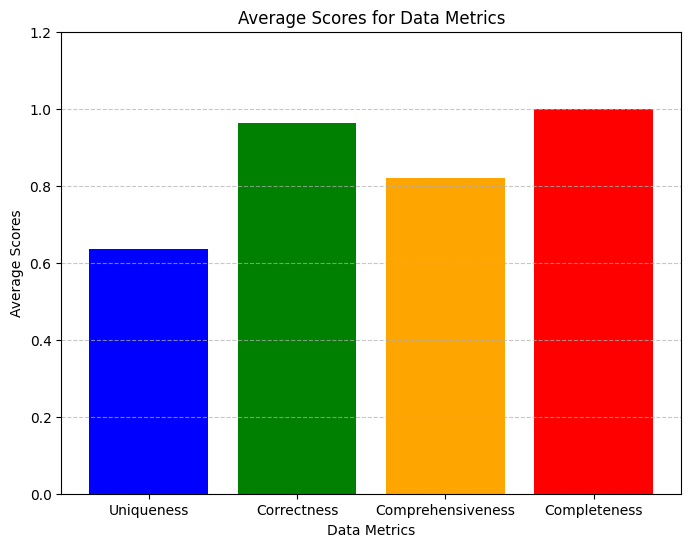

In [35]:
import matplotlib.pyplot as plt

# Data metrics and their average scores
data_metrics = ['Uniqueness', 'Correctness', 'Comprehensiveness', 'Completeness']
avg_scores = [0.6345, 0.9629, 0.8194, 1.00]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(data_metrics, avg_scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Data Metrics')
plt.ylabel('Average Scores')
plt.title('Average Scores for Data Metrics')
plt.ylim(0, 1.2)  # Set y-axis limit to accommodate scores
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
